In [274]:
#Import all the necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas_profiling

In [275]:
df1 = pd.read_csv("frequency_domain_features_train .csv")
df2 = pd.read_csv("heart_rate_non_linear_features_train.csv")
df3 = pd.read_csv("time_domain_features_train.csv")

In [276]:
df1.shape, df2.shape, df3.shape

((369289, 12), (369289, 7), (369289, 20))

In [277]:
df4 = df1.merge(right=df2,how='inner',on='uuid')

In [278]:
df4.shape

(369289, 18)

In [279]:
df5 = df4.merge(right=df3,how='inner',on='uuid')

In [280]:
df5.shape

(369289, 37)

In [281]:
df5.condition.nunique()

3

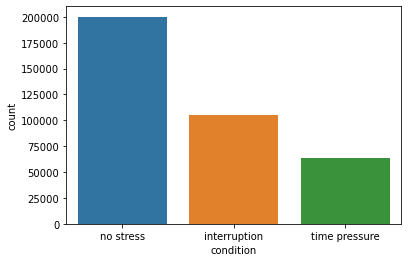

In [282]:
sns.countplot(df5["condition"])

In [296]:
conditions = [
    (df5['condition'] == "no stress"),
    (df5['condition'] == "interruption condition"),
    (df5['condition'] == "time pressure" )
    ]

In [297]:
values = [1,0,-1]

In [298]:
df5['condition2'] = np.select(conditions, values)

In [299]:
df6 = pd.read_csv("frequency_domain_features_test.csv")
df7 = pd.read_csv("heart_rate_non_linear_features_test.csv")
df8 = pd.read_csv("time_domain_features_test.csv")

In [300]:
df6.shape, df7.shape, df8.shape

((41033, 12), (41033, 7), (41033, 19))

In [301]:
df9 = df6.merge(right=df7,how='inner',on='uuid')
df10 = df9.merge(right=df8,how='inner',on='uuid')

In [302]:
conditions = [
    (df10['condition'] == "no stress"),
    (df10['condition'] == "interruption condition"),
    (df10['condition'] == "time pressure" )
    ]

In [303]:
values = [1,0,-1]

In [304]:
df10['condition2'] = np.select(conditions, values)

In [305]:
df10.shape

(41033, 37)

In [306]:
dftrain.shape

(369289, 35)

### Features to drop

In [342]:
dftest = df10.drop(['uuid','condition','datasetId','SD1','SKEW_REL_RR','KURT_REL_RR',
                    'SDSD_REL_RR', 'SDRR', 'HF_NU','SDSD'], axis = 1)

In [509]:
dftrain = df5.drop(['uuid','condition','datasetId','SD1','SKEW_REL_RR','KURT_REL_RR',
                    'SDSD_REL_RR', 'SDRR', 'HF_NU','SDSD'], axis=1)

# Train and Test set

In [510]:
dftrain.shape, dftest.shape

((369289, 28), (41033, 24))

In [511]:
df10.duplicated(subset='uuid').sum()

0

In [512]:
df5.duplicated(subset='uuid').sum()

0

### Set up validation set from the training set

In [513]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [558]:
X = dftrain.drop("HR",axis=1)
y = dftrain["HR"]

In [559]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

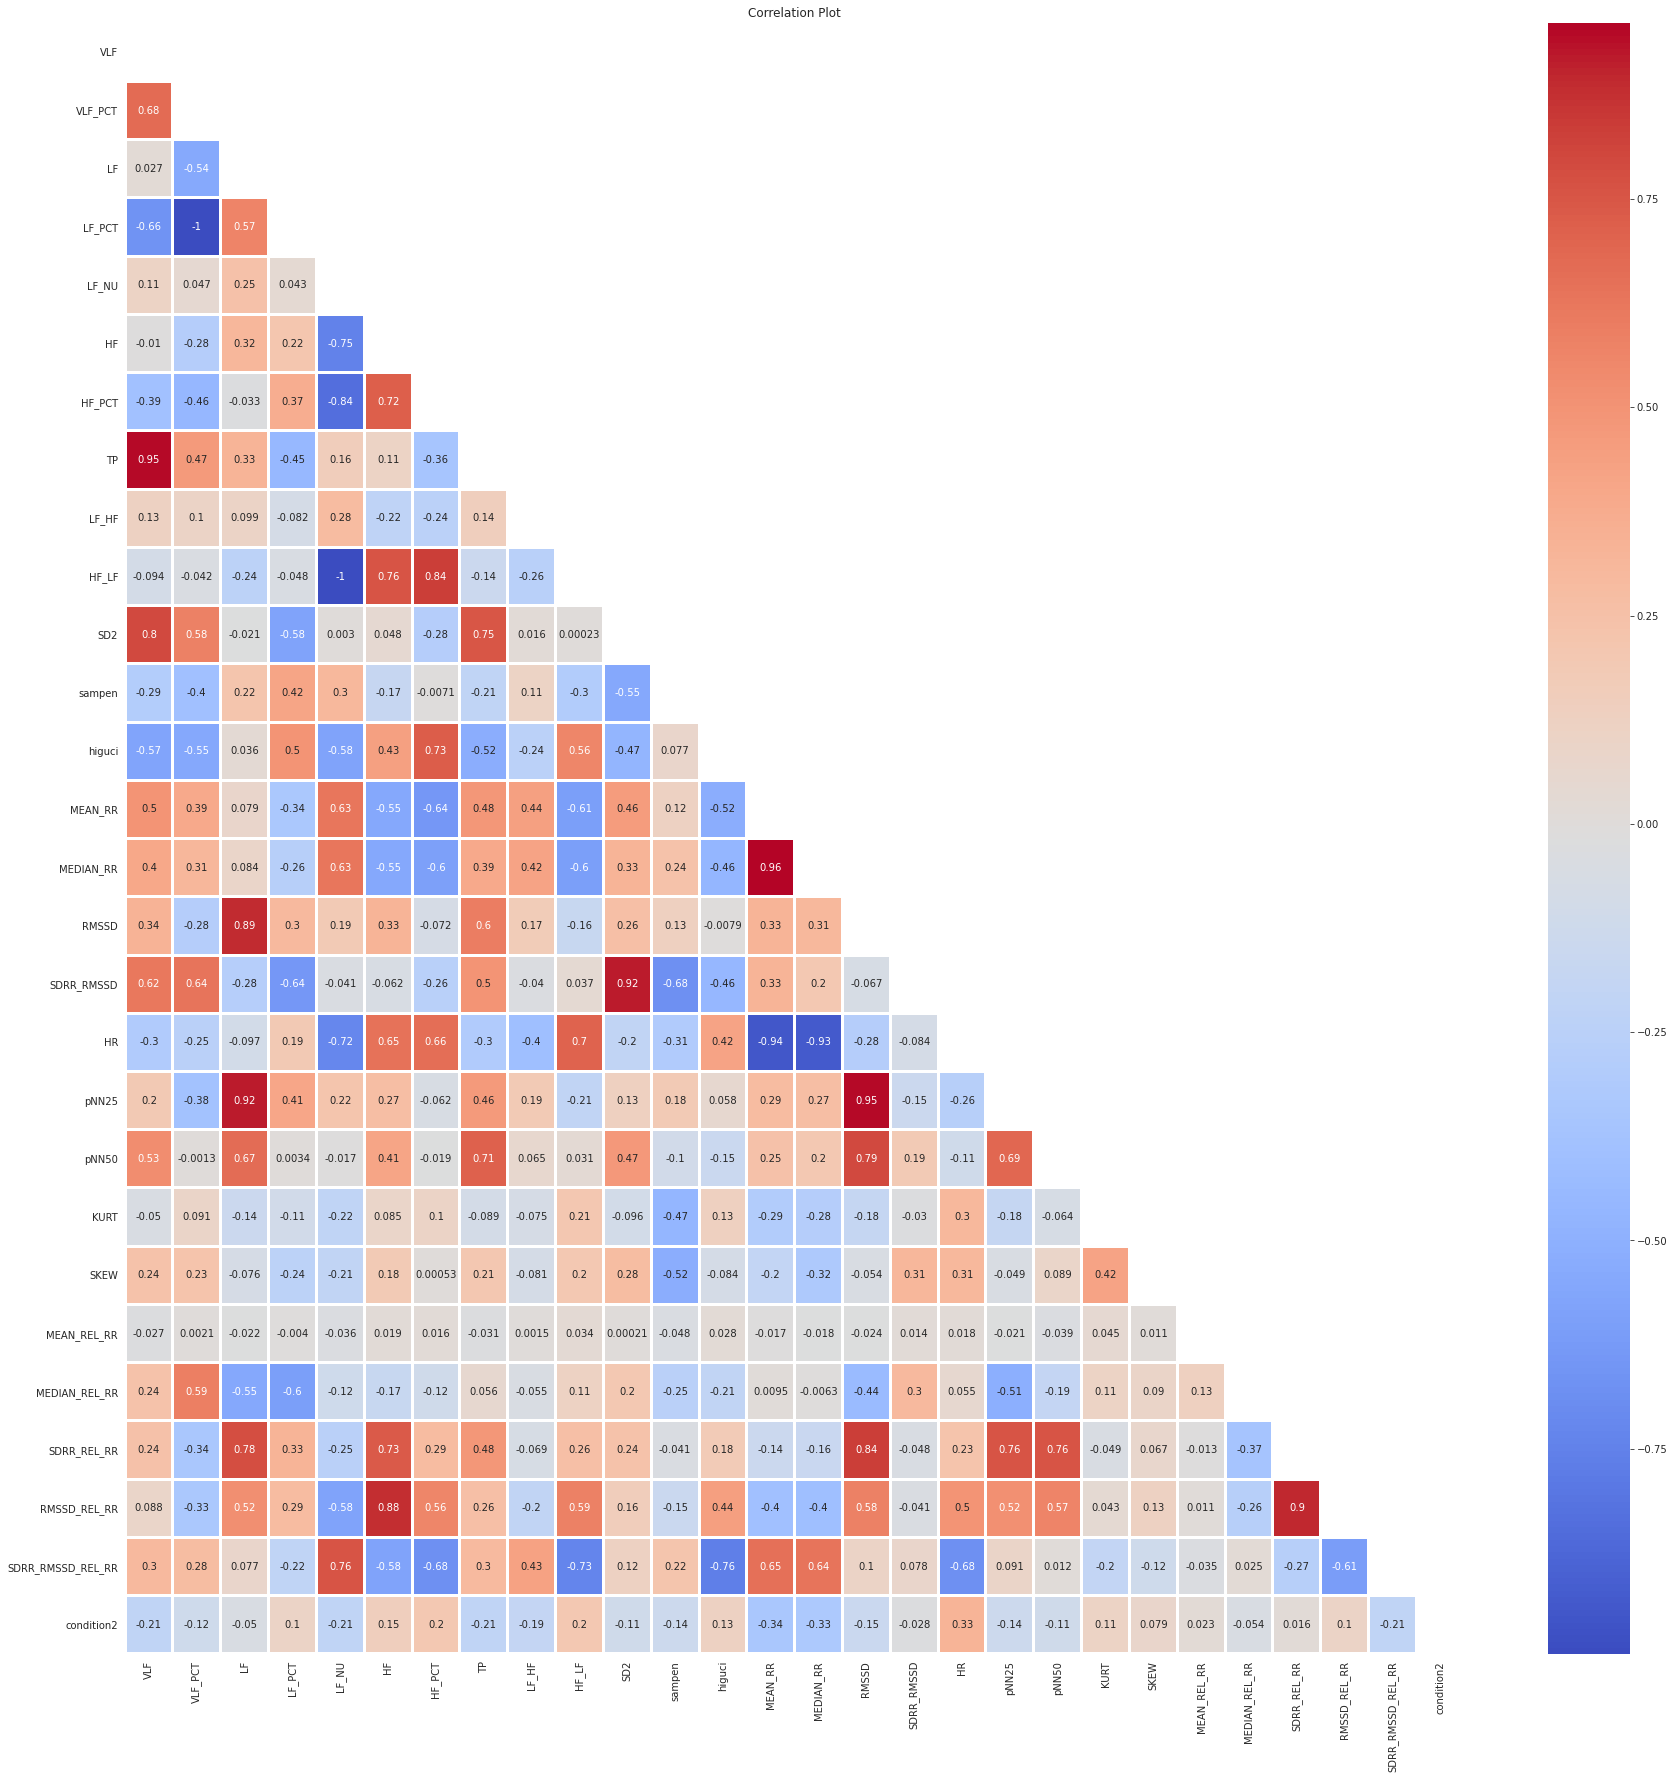

In [610]:
cp = dftrain.corr()
mask = np.zeros_like(cp)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
with sns.axes_style("white"):
    sns.heatmap(cp,annot=True,linewidth=2,mask = mask,cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()

In [560]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [655]:
X_train.shape

(332360, 27)

In [609]:
sc = StandardScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_val = pd.DataFrame(sc.transform(X_val),columns=X.columns)

X_train.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,TP,LF_HF,HF_LF,...,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDRR_RMSSD_REL_RR,condition2
0,-0.850461,-0.139308,-0.984299,0.123290,-0.183804,-0.404517,0.204009,-1.106199,-0.270674,0.126860,...,-1.054247,-0.874384,-0.548623,-0.319678,-0.556038,-0.446828,-1.121930,-0.724240,-0.523978,-1.797587
1,0.207041,-0.494574,1.859567,0.603678,0.948527,-0.631940,-0.786890,0.735448,0.206940,-0.878365,...,2.435465,1.817293,-0.324967,-0.675614,-0.075092,-0.923057,0.908367,0.478176,0.072576,-0.484008
2,3.465601,1.503677,-0.020234,-1.511359,-0.388739,0.458113,-0.557876,3.276715,-0.278136,0.319469,...,0.336757,1.750001,-0.882233,0.591298,-0.544726,0.736833,0.827142,0.541158,-0.139616,0.829571
3,-0.070555,-0.218677,0.513966,0.139282,-0.803162,1.430990,0.814190,0.120531,-0.288248,0.719753,...,0.255412,1.211666,-1.041454,-0.297102,0.103730,-0.029783,1.110613,1.349639,-0.959245,0.829571
4,0.081083,0.875895,-0.574053,-0.831399,0.777681,-0.695688,-0.770841,-0.111165,-0.098269,-0.732786,...,-0.484830,-0.605217,0.209012,-0.781857,-0.685079,0.625590,-0.755545,-1.037874,1.456332,0.829571


In [597]:
param_grid = {'alpha': np.arange(0,2,0.05)}

grid_tree = GridSearchCV(Lasso(), param_grid,cv=10, scoring= 'neg_mean_absolute_error')
grid_tree.fit(X_train, y_train)
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))

Lasso(alpha=0.0)
0.9561741759375278


In [562]:
# linear regression
lr = LinearRegression()


# fit models on training data 
lr.fit(X_train, y_train)

# make predictions on test data
y_pred_lr = lr.predict(X_val)

# calculate preformance measures linear regression
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
mse_lr = mean_squared_error(y_val, y_pred_lr)
mae_lr = mean_absolute_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)
adjr2_lr = 1-(1-r2_lr)*(len(y_val)-1)/(len(y_val)-len(X_val.columns)-1)

In [563]:
resultsDf1 = pd.DataFrame({'Method':['Linear Regression'], 'RMSE': rmse_lr , 'MSE': mse_lr , 'MAE': mae_lr ,"R2": r2_lr, 'Adj_R2': adjr2_lr})
resultsDf1

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Linear Regression,1.418821,2.013052,0.949578,0.981004,0.98099


In [564]:
linear_coef = pd.DataFrame()
linear_coef['linear_Col'] = X_train.columns
linear_coef['linear_Coeff'] = abs(np.round((lr.coef_),3))
linear_coef.sort_values(by='linear_Coeff',ascending=False).head(33)

,linear_Col,linear_Coeff
1,VLF_PCT,1.140674e+12
3,LF_PCT,1.090660e+12
7,TP,8.146233e+11
0,VLF,7.691013e+11
2,LF,2.430829e+11
6,HF_PCT,1.197870e+11
5,HF,1.922790e+10
13,MEAN_RR,1.196700e+01
4,LF_NU,5.172000e+00
9,HF_LF,4.987000e+00


In [598]:
# lasso regression
lasso = Lasso(alpha = 0.0)

# fit lasso on training data
lasso.fit(X_train, y_train)

# make prediciton on test data
y_pred_lasso = lasso.predict(X_val)

In [599]:
# calculate preformance measures lasso regression
rmse_lasso = np.sqrt(mean_squared_error(y_val, y_pred_lasso))
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)
adjr2_lasso = 1-(1-r2_lasso)*(len(y_val)-1)/(len(y_val)-len(X_val.columns)-1)

In [600]:
resultsDf2 = pd.DataFrame({'Method':['Lasso Regression'], 'RMSE': rmse_lasso , 'MSE': mse_lasso , 'MAE': mae_lasso ,"R2": r2_lasso, 'Adj_R2': adjr2_lasso})
resultsDf2

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Lasso Regression,1.418689,2.012677,0.949435,0.981008,0.980994


In [601]:
lasso_coef = pd.DataFrame()
lasso_coef['lasso_Col'] = X_train.columns
lasso_coef['lasso_Coeff'] = abs(np.round((lasso.coef_),3))
lasso_coef.sort_values(by='lasso_Coeff',ascending=False).head(33)

,lasso_Col,lasso_Coeff
13,MEAN_RR,11.954
4,LF_NU,4.959
9,HF_LF,4.793
15,RMSSD,4.382
17,pNN25,2.524
10,SD2,2.273
14,MEDIAN_RR,2.013
24,RMSSD_REL_RR,1.820
0,VLF,0.716
8,LF_HF,0.643


In [602]:
# ridge regression
ridge = Ridge(alpha = 1.95)

# fit ridge on training data
ridge.fit(X_train, y_train)

# make prediciton on test data
y_pred_ridge = ridge.predict(X_val)

In [603]:
# calculate preformance measures ridge regression
rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)
adjr2_ridge = 1-(1-r2_ridge)*(len(y_val)-1)/(len(y_val)-len(X_val.columns)-1)

resultsDf3 = pd.DataFrame({'Method':['Ridge Regression'], 'RMSE': rmse_ridge , 'MSE': mse_ridge , 'MAE': mae_ridge ,"R2": r2_ridge, 'Adj_R2': adjr2_ridge})
resultsDf3

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Ridge Regression,1.418801,2.012996,0.949477,0.981005,0.980991


In [604]:
ridge_coef = pd.DataFrame()
ridge_coef['ridge_Col'] = X_train.columns
ridge_coef['ridge_Coeff'] = abs(np.round((ridge.coef_),3))
ridge_coef.sort_values(by='ridge_Coeff',ascending=False).head(33)


,ridge_Col,ridge_Coeff
13,MEAN_RR,11.962
4,LF_NU,5.152
9,HF_LF,4.969
15,RMSSD,4.403
17,pNN25,2.528
10,SD2,2.274
14,MEDIAN_RR,2.015
24,RMSSD_REL_RR,1.800
8,LF_HF,0.645
18,pNN50,0.566


In [605]:
linear = pd.concat([resultsDf1, resultsDf2, resultsDf3],axis=0)
linear                            

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Linear Regression,1.418821,2.013052,0.949578,0.981004,0.980990
0,Lasso Regression,1.418689,2.012677,0.949435,0.981008,0.980994
0,Ridge Regression,1.418801,2.012996,0.949477,0.981005,0.980991


In [606]:
pd.concat([linear_coef, lasso_coef, ridge_coef],axis=1)

,linear_Col,linear_Coeff,lasso_Col,lasso_Coeff,ridge_Col,ridge_Coeff
0,VLF,7.691013e+11,VLF,0.716,VLF,0.361
1,VLF_PCT,1.140674e+12,VLF_PCT,0.267,VLF_PCT,0.463
2,LF,2.430829e+11,LF,0.427,LF,0.542
3,LF_PCT,1.090660e+12,LF_PCT,0.619,LF_PCT,0.428
4,LF_NU,5.172000e+00,LF_NU,4.959,LF_NU,5.152
5,HF,1.922790e+10,HF,0.025,HF,0.040
6,HF_PCT,1.197870e+11,HF_PCT,0.520,HF_PCT,0.506
7,TP,8.146233e+11,TP,0.201,TP,0.178
8,LF_HF,6.450000e-01,LF_HF,0.643,LF_HF,0.645
9,HF_LF,4.987000e+00,HF_LF,4.793,HF_LF,4.969


In [607]:
X_val.columns

Index(['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'TP',
       'LF_HF', 'HF_LF', 'SD2', 'sampen', 'higuci', 'MEAN_RR', 'MEDIAN_RR',
       'RMSSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'condition2'],
      dtype='object')

KeyboardInterrupt: 

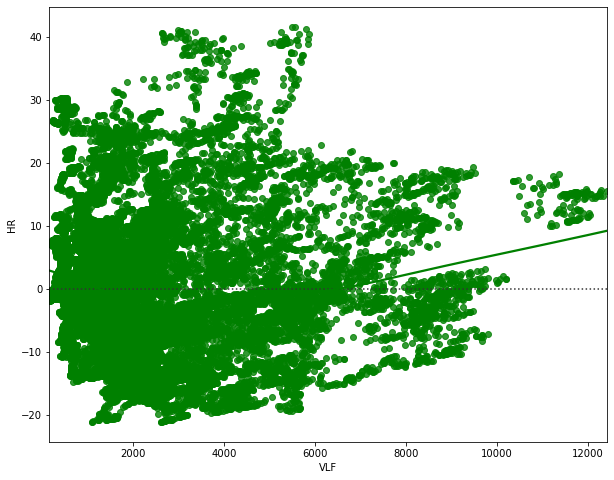

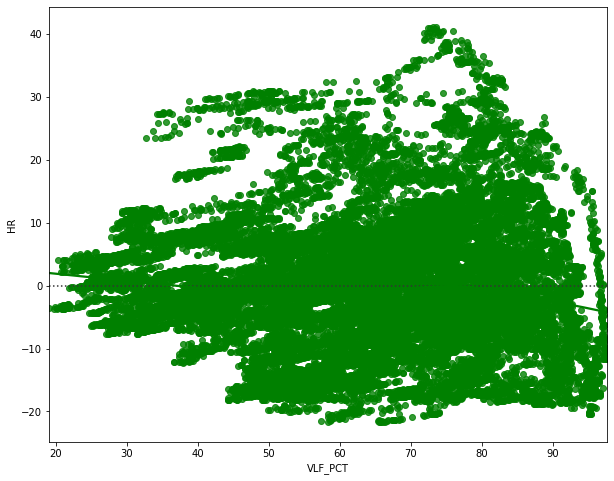

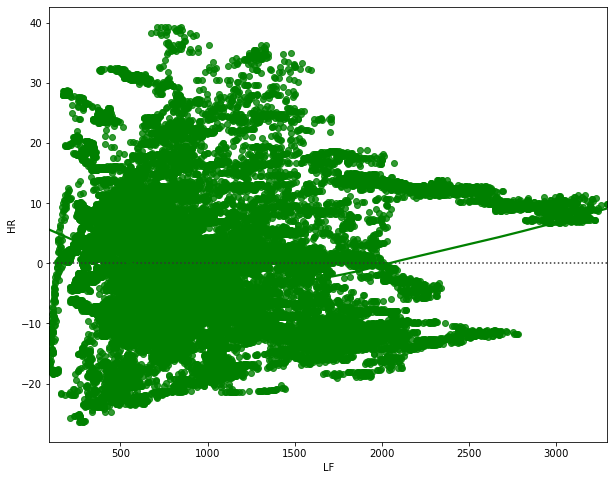

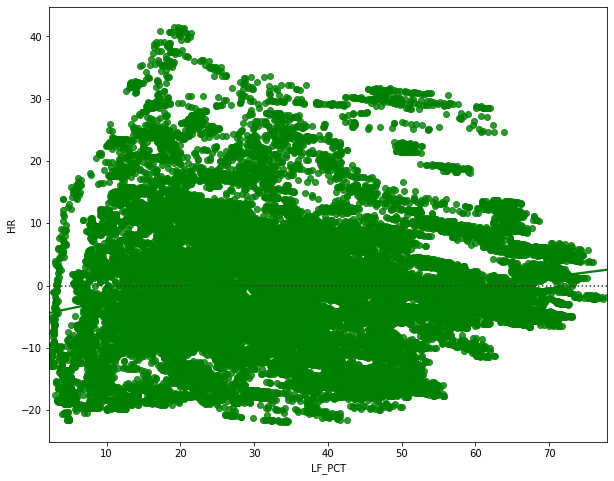

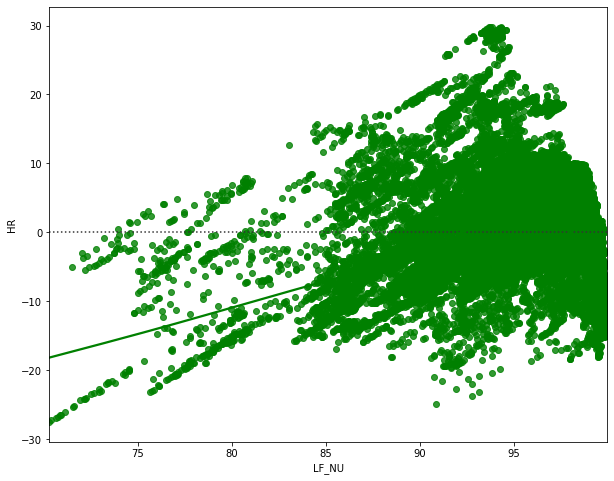

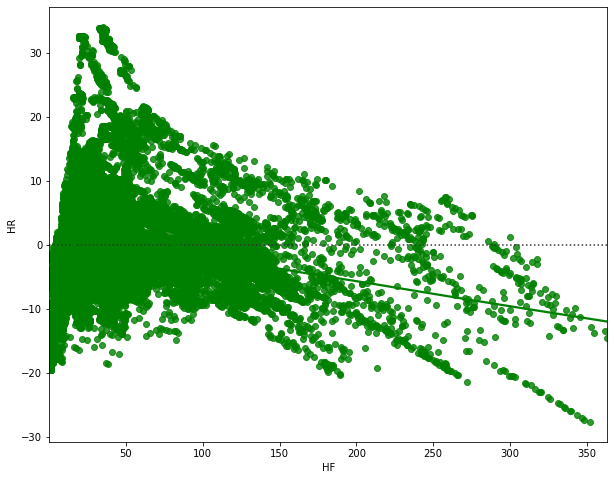

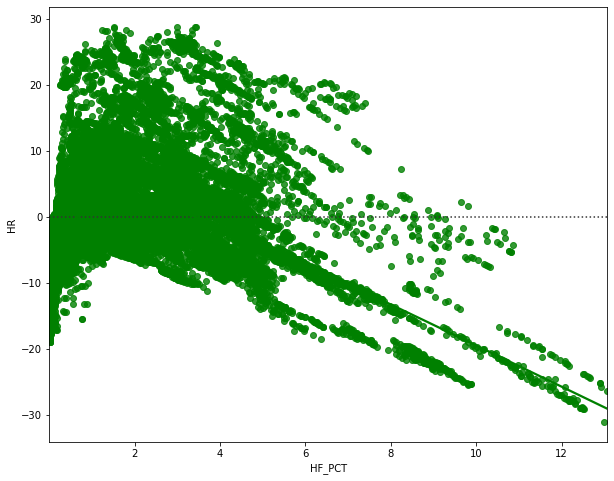

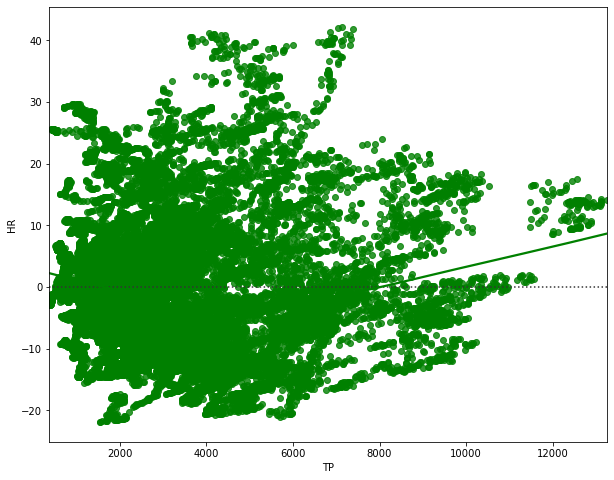

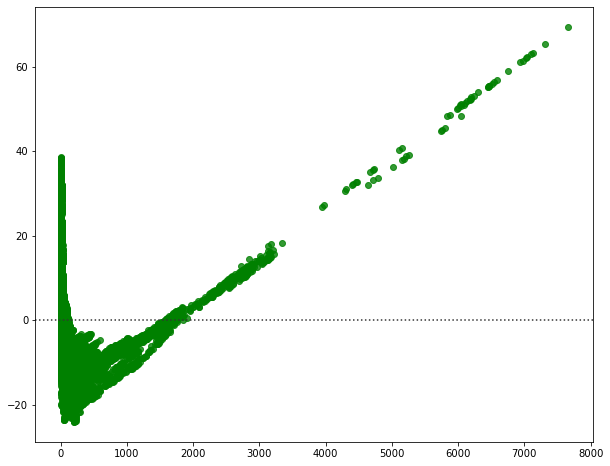

In [532]:
#Residual plots

for i in ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'TP',
       'LF_HF', 'HF_LF', 'SD2', 'sampen', 'higuci', 'MEAN_RR', 'MEDIAN_RR',
       'RMSSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'condition2']:
    fig = plt.figure(figsize=(10,8))
    sns.residplot(x= X_val[i], y= y_val, color='green', lowess=True )

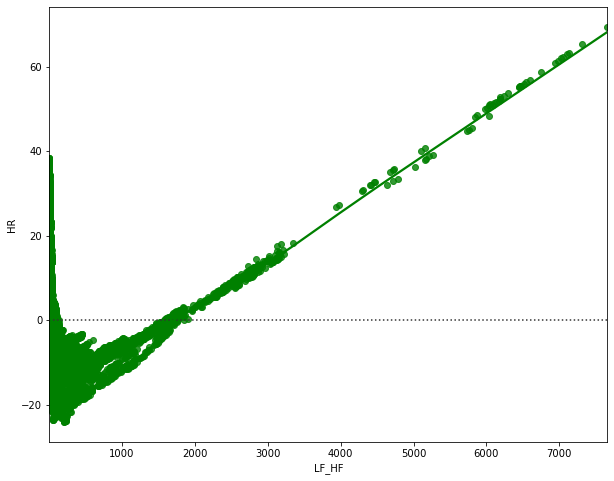

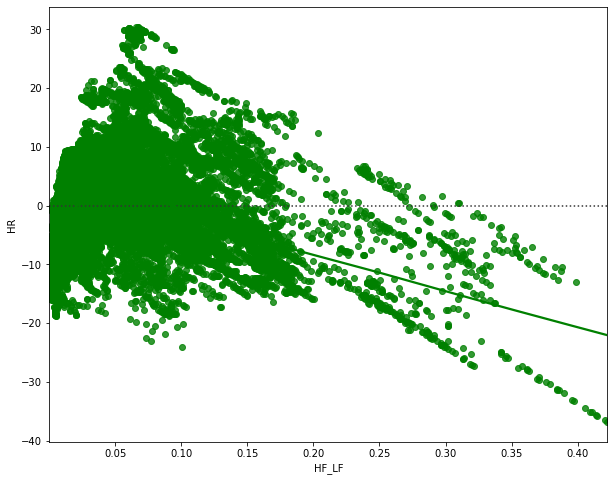

In [533]:
for i in ['LF_HF', 'HF_LF']:
    fig = plt.figure(figsize=(10,8))
    sns.residplot(x= X_val[i], y= y_val, color='green', lowess=True )

In [611]:
X = dftrain.drop("HR",axis=1)
y = dftrain["HR"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)

Random foresrt

In [652]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1, n_estimators=12, max_depth=50)
rf.fit(X_train,y_train)
#rf.score(X_train,y_train)
y_pred_rf_train=rf.predict(X_train)
y_pred_rf_val=rf.predict(X_val)
print('Train R2 score: ', r2_score(y_train,y_pred_rf_train))
print('Validation R2 score: ', r2_score(y_val,y_pred_rf_val))

Train R2 score:  0.9999980228209902
Validation R2 score:  0.9999915026165934


In [653]:
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf_val))
mse_rf = mean_squared_error(y_val, y_pred_rf_val)
mae_rf = mean_absolute_error(y_val, y_pred_rf_val)
r2_rf = r2_score(y_val, y_pred_rf_val)
adjr2_rf = 1-(1-r2_rf)*(len(y_val)-1)/(len(y_val)-len(X_val.columns)-1)

resultsDf1 = pd.DataFrame({'Method':['Random Forest'], 'RMSE': rmse_rf , 'MSE': mse_rf , 'MAE': mae_rf ,"R2": r2_rf, 'Adj_R2': adjr2_rf})
resultsDf1

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Random Forest,0.030008,0.0009,0.00766,0.999992,0.999991


In [654]:
rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
mse_rf = mean_squared_error(y_train, y_pred_rf_train)
mae_rf = mean_absolute_error(y_train, y_pred_rf_train)
r2_rf = r2_score(y_train, y_pred_rf_train)
adjr2_rf = 1-(1-r2_rf)*(len(y_train)-1)/(len(y_train)-len(X_train.columns)-1)

resultsDf1 = pd.DataFrame({'Method':['Random Forest'], 'RMSE': rmse_rf , 'MSE': mse_rf , 'MAE': mae_rf ,"R2": r2_rf, 'Adj_R2': adjr2_rf})
resultsDf1

,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Random Forest,0.014542,0.000211,0.003568,0.999998,0.999998


In [643]:
rf_coef = pd.DataFrame()
rf_coef['rf_Col'] = X_train.columns
rf_coef['rf_Coeff'] = abs(np.round((rf.feature_importances_),5))
rf_coef.sort_values(by='rf_Coeff',ascending=False)

,rf_Col,rf_Coeff
14,MEDIAN_RR,0.73775
13,MEAN_RR,0.23405
6,HF_PCT,0.01294
10,SD2,0.00626
5,HF,0.00273
24,RMSSD_REL_RR,0.00127
25,SDRR_RMSSD_REL_RR,0.00070
23,SDRR_REL_RR,0.00060
19,KURT,0.00060
16,SDRR_RMSSD,0.00050


Gradient Boost

In [649]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(random_state=1,n_estimators=50 ,max_depth=50,learning_rate=.1)
gb.fit(X_train,y_train)
#gb.score(X_train,y_train)
y_pred_gbtr=gb.predict(X_train)
y_pred_gbval=gb.predict(X_val)
print('Train R2 score: ',r2_score(y_train,y_pred_gbtr))
print('Test R2 score: ',r2_score(y_val,y_pred_gbval))

Train R2 score:  0.9999734386011124
Test R2 score:  0.9999302643619778


In [650]:
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gbval))
mse_gb = mean_squared_error(y_val, y_pred_gbval)
mae_gb = mean_absolute_error(y_val, y_pred_gbval)
r2_gb = r2_score(y_val, y_pred_gbval)
adjr2_gb = 1-(1-r2_gb)*(len(y_val)-1)/(len(y_val)-len(X_val.columns)-1)


resultsDf2 = pd.DataFrame({'Method':['Gradient Boost'], 'RMSE': rmse_gb , 'MSE': mse_gb , 'MAE': mae_gb ,"R2": r2_gb, 'Adj_R2': adjr2_gb})
resultsDf2


,Method,RMSE,MSE,MAE,R2,Adj_R2
0,Gradient Boost,0.085966,0.00739,0.044468,0.99993,0.99993


ModuleNotFoundError: No module named 'mlxtend'